In [170]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

In [171]:
data = pd.read_csv('train.csv')
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [172]:
data.shape

(45211, 11)

# Cleaning

In [173]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [174]:
data = data.drop_duplicates()
data.shape

(45205, 11)

In [175]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [176]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [177]:
iqr1 = data['dur'].quantile(0.75) - data['dur'].quantile(0.25)
upper_threshold1 = data['dur'].quantile(0.75) + (1.5 * iqr1)
lower_threshold1 = data['dur'].quantile(0.25) - (1.5 * iqr1)
upper_threshold1, lower_threshold1

(643.0, -221.0)

In [178]:
data.dur = data.dur.clip(0, 643.0)
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.763898
std,10.619130,8.32234,176.75476,3.098189
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,63.000000


In [179]:
iqr2 = data['num_calls'].quantile(0.75) - data['num_calls'].quantile(0.25)
upper_threshold2 = data['num_calls'].quantile(0.75) + (1.5 * iqr2)
lower_threshold2 = data['num_calls'].quantile(0.25) - (1.5 * iqr2)
upper_threshold2, lower_threshold2

(6.0, -2.0)

In [180]:
data.num_calls = data.num_calls.clip(1, 6.0)
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


### There are no null values, duplicates are removed, dataset is structured, it is in right format and the outliers are also cliiped.

# Exploratory Data Analysis

In [181]:
data['target'] = data['y'].map({'yes' : 1, 'no' : 0})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,no,0


<AxesSubplot: xlabel='y', ylabel='count'>

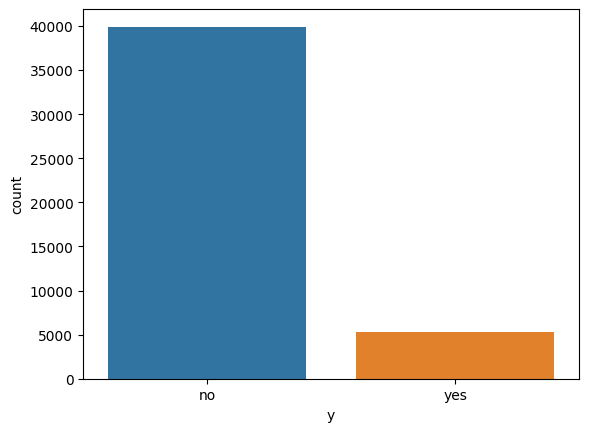

In [182]:
sn.countplot(x = 'y', data = data)

In [183]:
data['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot: ylabel='job'>

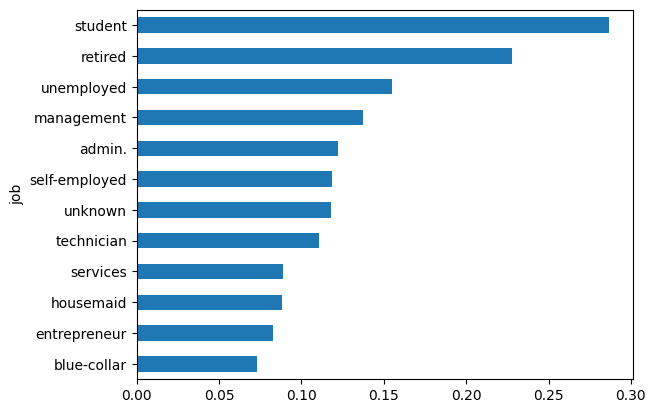

In [184]:
data.groupby('job')['target'].mean().sort_values().plot(kind = 'barh')

<AxesSubplot: ylabel='job'>

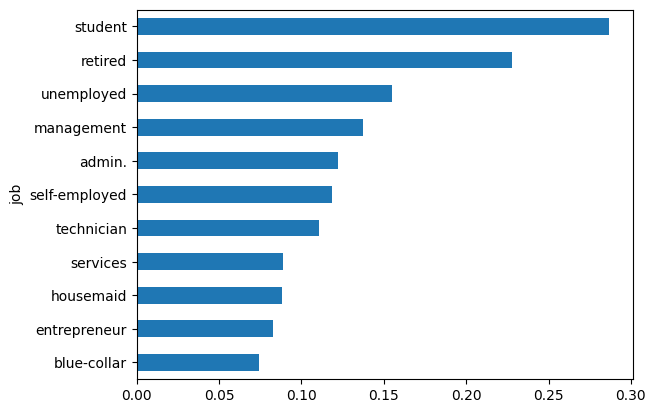

In [185]:
data['job'] = data['job'].replace('unknown', 'blue-collar')
data.groupby('job')['target'].mean().sort_values().plot(kind = 'barh')

In [186]:
data['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

<AxesSubplot: ylabel='marital'>

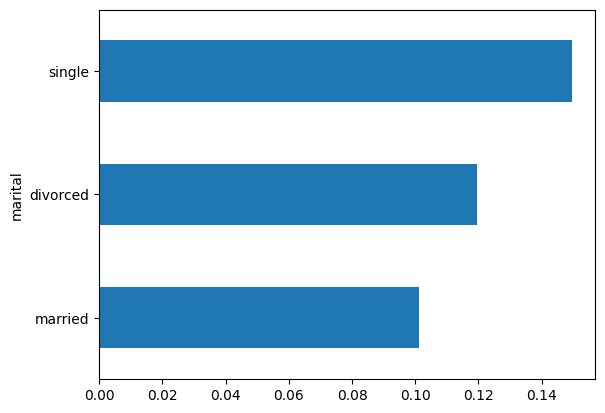

In [187]:
data.groupby('marital')['target'].mean().sort_values().plot(kind = 'barh')

In [188]:
data['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

<AxesSubplot: ylabel='education_qual'>

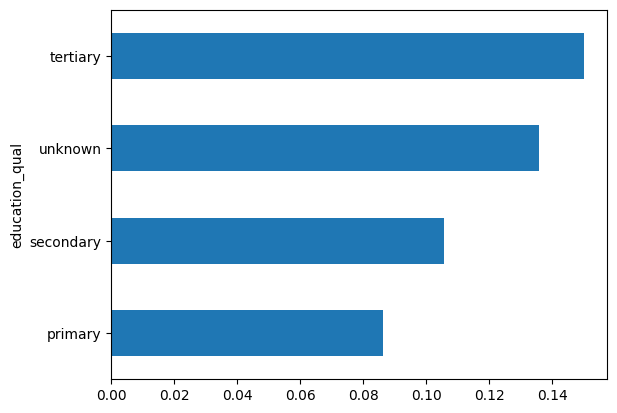

In [189]:
data.groupby('education_qual')['target'].mean().sort_values().plot(kind = 'barh')

<AxesSubplot: ylabel='education_qual'>

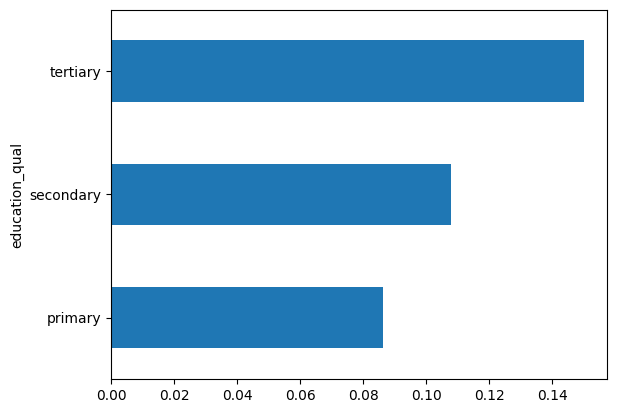

In [190]:
data['education_qual'] = data['education_qual'].replace('unknown', 'secondary')
data.groupby('education_qual')['target'].mean().sort_values().plot(kind = 'barh')

In [191]:
data['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

<AxesSubplot: ylabel='call_type'>

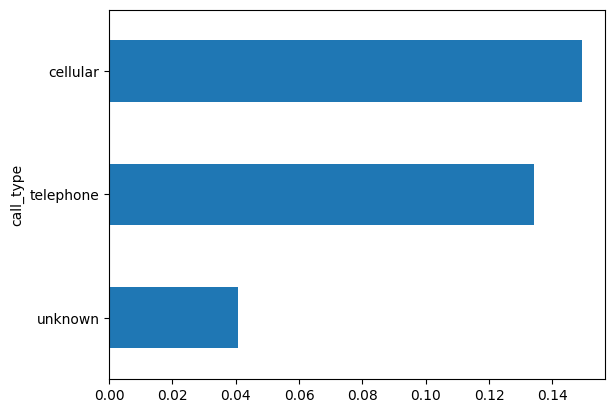

In [192]:
data.groupby('call_type')['target'].mean().sort_values().plot(kind = 'barh')

In [193]:
data['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<AxesSubplot: ylabel='mon'>

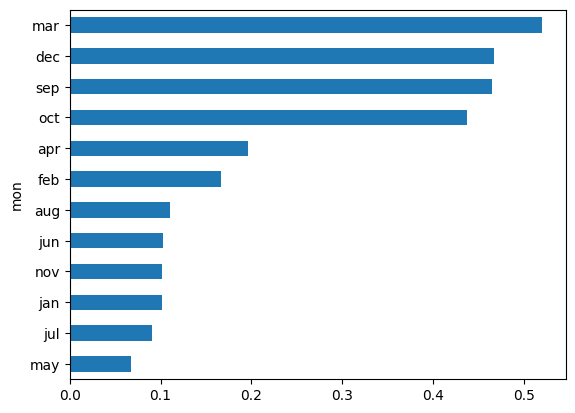

In [194]:
data.groupby('mon')['target'].mean().sort_values().plot(kind = 'barh')

In [195]:
data['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

<AxesSubplot: ylabel='prev_outcome'>

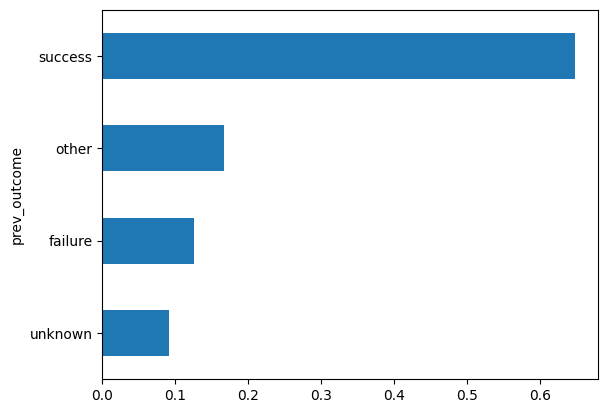

In [196]:
data.groupby('prev_outcome')['target'].mean().sort_values().plot(kind = 'barh')

### From the first graph we can observe that the dataset is unbalanced. In EDA, All the categories show an ordinal realtionship, for which we will be using label encoding. Most of the unknown values are imputed until unless they had more percentage in that category.

### Till here, cleaning is completed.

## Encoding

In [197]:
#job
data['job_enc'] = data['job'].map({'blue-collar' : 1, 'entrepreneur' : 2, 'housemaid' : 3, 'services' : 4, 'technician' : 5, 
                                  'self-employed' : 6, 'admin.' : 7, 'management' : 8, 'unemployed' : 9, 'retired' : 10, 
                                  'student' : 11})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,8
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,5
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,2
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,1
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,1


In [198]:
data['marital_enc'] = data['marital'].map({'married' : 1, 'divorced' : 2, 'single' : 3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,8,1
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,5,3
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,2,1
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,1,1
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,1,3


In [199]:
data['education_enc'] = data['education_qual'].map({'primary' : 1, 'secondary' : 2, 'tertiary' : 3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,8,1,3
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,5,3,2
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,2,1,2
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,1,1,2
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,1,3,2


In [200]:
data['calltype_enc'] = data['call_type'].map({'unknown' : 1, 'telephone' : 2, 'cellular' : 3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,8,1,3,1
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,5,3,2,1
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,2,1,2,1
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,1,1,2,1
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,1,3,2,1


In [201]:
data['month_enc'] = data['mon'].map({'may' : 1, 'jul' : 2, 'jan' : 3, 'nov' : 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8,
                                    'oct' : 9, 'sep' : 10, 'dec' : 11, 'mar' : 12})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc,month_enc
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,8,1,3,1,1
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,5,3,2,1,1
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,2,1,2,1,1
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,1,1,2,1,1
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,1,3,2,1,1


In [202]:
data['prev_outcome_enc'] = data['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success' : 4})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc,month_enc,prev_outcome_enc
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,8,1,3,1,1,1
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,5,3,2,1,1,1
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,2,1,2,1,1,1
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,1,1,2,1,1,1
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,1,3,2,1,1,1


### Each feature is label encoded using the order found during the exploratory data analysis.

## Splitting the data

In [103]:
#df = data['age', 'job_enc']
X = data[['age', 'job_enc', 'marital_enc', 'education_enc', 'calltype_enc', 'day', 'month_enc', 'dur', 'num_calls', 'prev_outcome_enc']].values
y = data['target']
print(X.shape)
print(y.shape)

(45205, 10)
(45205,)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10) # 80 to 20 ratio split to training and test data

## Hyper parameter tuning and k-fold cross validation of unbalanced data

In [105]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline


In [147]:
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=8)],
                                ['classifier', LogisticRegression(random_state=8,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=8)
    
param_grid = {'classifier__C':[800, 900, 950, 1000, 1100]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

best_model = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(best_model.best_estimator_)

Cross-validation score: 0.892683288740908
Test score: 0.8897916816145461
Pipeline(steps=[('smote', SMOTEENN(random_state=8)),
                ['classifier',
                 LogisticRegression(C=900, max_iter=1000, random_state=8)]])


#### Here the hyper-parameter for the logistic regression model is obtained using stratiifed k-fold cross validation, which is C= 900

In [150]:
from sklearn.tree import DecisionTreeClassifier
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=8)],
                                ['classifier', DecisionTreeClassifier(random_state=8)]])

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=8)
    
param_grid = {'classifier__max_depth':[5, 7, 8, 9, 10, 11]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

best_model = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(best_model.best_estimator_)

Cross-validation score: 0.8828128726260662
Test score: 0.8849408727004243
Pipeline(steps=[('smote', SMOTEENN(random_state=8)),
                ['classifier',
                 DecisionTreeClassifier(max_depth=8, random_state=8)]])


#### Here the hyper-parameter for decision tree model is obtained, which is max_depth = 8

In [159]:
from xgboost import XGBClassifier
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=8)],
                                ['classifier', XGBClassifier(random_state=8, n_estimators = 100)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=8)
    
param_grid = {'classifier__learning_rate':[ 0.12, 0.13, 0.14, 0.15]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

best_model = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(best_model.best_estimator_)

Cross-validation score: 0.9258309263726192
Test score: 0.9242186906154785
Pipeline(steps=[('smote', SMOTEENN(random_state=8)),
                ['classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.14,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing

#### Here the hyper-parameter for XG boost model is obtained, which is learning_rate = 0.14

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', KNeighborsClassifier()]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__n_neighbors':[78, 79, 80, 81, 82]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

best_model = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(best_model.best_estimator_)

Cross-validation score: 0.900636638809212
Test score: 0.8966088026849114
Pipeline(steps=[('smote', SMOTEENN(random_state=11)),
                ('scaler', StandardScaler()),
                ['classifier', KNeighborsClassifier(n_neighbors=79)]])


#### Here the hyper-parameter for K-NN model is obtained, which is k = 79

In [157]:
from sklearn.ensemble import RandomForestClassifier
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=8)],
                                ['classifier', RandomForestClassifier(n_estimators = 100, random_state=8)]])

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=8)
    
param_grid = {'classifier__max_depth':[16, 17, 18, 19]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

best_model = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(best_model.best_estimator_)

Cross-validation score: 0.9201243477843619
Test score: 0.9164419452773818
Pipeline(steps=[('smote', SMOTEENN(random_state=8)),
                ['classifier',
                 RandomForestClassifier(max_depth=19, random_state=8)]])


#### Here the hyper-parameter for Random Forest model is obtained, which is max_depth = 19

## Balancing the data using SMOTEENN technique

In [152]:
from imblearn.combine import SMOTEENN

#plot_2d_space(X, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all', random_state = 8)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

#plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [94]:
y_train.shape

(36164,)

In [95]:
y_smt.shape

(53976,)

In [96]:
X_train.shape

(36164, 10)

In [97]:
X_smt.shape

(53976, 10)

## Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression(C = 900, max_iter = 1000, random_state = 8) #initialise the required package
logistic_regression.fit(X_smt,y_smt) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

log_roc = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:,1])
log_roc

0.8897916816145461

## K-NN Classification model

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_smt2 = scaler.fit_transform(X_smt)
X_test2 = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 79)
knn.fit(X_smt2,y_smt)

knn_roc = roc_auc_score(y_test, knn.predict_proba(X_test2)[:,1])
knn_roc

0.8964521607470697

## Decision Tree model

In [155]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth = 8, random_state = 8)

# Fit dt to the training set
dt.fit(X_smt, y_smt) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
#y_pred = dt.predict(X_test)

dt_roc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
dt_roc

0.8849408727004243

In [156]:
import warnings
warnings.filterwarnings('ignore')

## Random forest model

In [158]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 19, random_state = 8)
rf.fit(X_smt, y_smt)

rf_roc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
rf_roc

0.9164419452773818

## XG Boost model

In [160]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, random_state = 8)
model.fit(X_smt,y_smt) #train the model


from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
#y_pred = model.predict(X_test) # Model's predictions

# Compute test set accuracy
xg_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("Test set auc: {:.2f}".format(xg_roc))


Test set auc: 0.92


In [163]:
eval_metrics = pd.DataFrame({'model' : ['logistic regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XG Boost'],
                           'roc_auc_scores' : [log_roc, knn_roc, dt_roc, rf_roc, xg_roc]})
eval_metrics

,model,roc_auc_scores
0,logistic regression,0.889792
1,K-Nearest Neighbors,0.896452
2,Decision Tree,0.884941
3,Random Forest,0.916442
4,XG Boost,0.924219


## From the above table, we can conclude that XG boost model has performed better in prediciting the target variable.